# Plot discriminating variables

In [1]:
import os
import pandas as pd
import ROOT
from array import array
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from tableauColors import palette

Welcome to JupyROOT 6.18/00


## Load data

In [2]:
DATA_DIR = '/groups/hep/mojen/repositories/DREAM/Run/final_run/tauolaevts/25000/wothreshold'
df = pd.read_csv(os.path.join(DATA_DIR, 'dftrain.csv'))
print(df.shape)
df.head()

(28537, 16)


,eventId,clusterId,PrimaryDecayMode,VecShowerEnergy,S_sum,C_sum,S_rad_mean,C_rad_mean,S_hot,C_hot,CoverS,rec_energy,label,comi,comj,label_binary
0,0,0,1,19816.199882,1826.0773,0.0000,5.811311,NaN,0.042815,NaN,0.000000,2303.326564,1,194.160770,112.979380,1
1,3,7,2,17549.797631,8279.6270,3685.8650,10.236175,6.187121,0.031075,0.054455,0.445173,9480.216665,3,188.307433,138.300525,1
2,4,9,4,1374.572872,1247.4332,1253.1638,2.116053,1.758508,0.150425,0.185714,1.004594,1245.935495,2,126.842764,160.114387,0
3,4,10,4,5149.657875,4351.9614,4699.3647,1.899068,1.732889,0.185474,0.222857,1.079827,4261.166794,2,163.232638,136.201391,0
4,4,11,4,1094.463954,0.0000,1038.3358,NaN,1.347302,NaN,0.344828,NaN,-271.371314,2,110.620700,146.008600,0


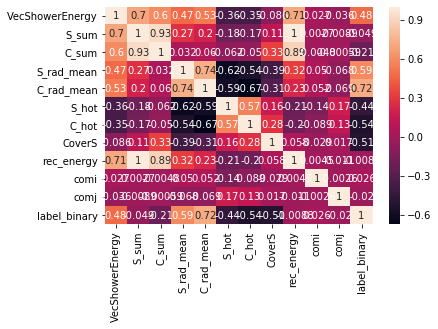

In [3]:
excl_columns = ['eventId', 'clusterId', 'PrimaryDecayMode', 'label'] # 'VecShowerEnergy', 
df_vars = df.drop(excl_columns, axis=1)
corrMatrix = df_vars.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

## Convert to RDataFrame

In [4]:
f = ROOT.TFile('dftrain.root', 'recreate' )
t = ROOT.TTree('train', 'tree with train set' )

PrimaryDecayMode = array('i', [0])
VecShowerEnergy = array('d', [0.])
S_sum = array('d', [0.])
C_sum = array('d', [0.])
S_rad_mean = array('d', [0.])
C_rad_mean = array('d', [0.])
S_hot = array('d', [0.])
C_hot = array('d', [0.])
CoverS = array('d', [0.])
# dist2charge = array('d', [0.])
rec_energy = array('d', [0.])
label = array('i', [0])

t.Branch('PrimaryDecayMode', PrimaryDecayMode, "PrimaryDecayMode/I")
t.Branch('VecShowerEnergy', VecShowerEnergy, "VecShowerEnergy/D")
t.Branch('S_sum', S_sum, "S_sum/D")
t.Branch('C_sum', C_sum, "C_sum/D")
t.Branch('S_rad_mean', S_rad_mean, "S_rad_mean/D")
t.Branch('C_rad_mean', C_rad_mean, "C_rad_mean/D")
t.Branch('S_hot', S_hot, "S_hot/D")
t.Branch('C_hot', C_hot, "C_hot/D")
t.Branch('CoverS', CoverS, "CoverS/D")
# t.Branch('dist2charge', dist2charge, "dist2charge/D")
t.Branch('rec_energy', rec_energy, "rec_energy/D")
t.Branch('label', label, "label/I")

for i in range(df.shape[0]):
    PrimaryDecayMode[0] = df.PrimaryDecayMode.values[i] 
    VecShowerEnergy[0] = df.VecShowerEnergy.values[i]
    S_sum[0] = df.S_sum.values[i]
    C_sum[0] = df.C_sum.values[i]
    S_rad_mean[0] = df.S_rad_mean.values[i]
    C_rad_mean[0] = df.C_rad_mean.values[i]
    S_hot[0] = df.S_hot.values[i]
    C_hot[0] = df.C_hot.values[i]
    CoverS[0] = df.CoverS.values[i]
    rec_energy[0] = df.rec_energy.values[i]
#     dist2charge[0] = df.dist2charge.values[i]
    label[0] = df.label.values[i]
    t.Fill()
f.Write()
f.Close()

## Load RDataFrame

In [26]:
d = ROOT.ROOT.RDataFrame("train", "dftrain.root")

In [27]:
d.AsNumpy()

{'PrimaryDecayMode': numpy.array([1, 2, 4, ..., 0, 3, 3], dtype=int32),
 'VecShowerEnergy': numpy.array([19816.19988175, 17549.79763131,  1374.57287201, ...,
               7479.42116909, 19905.51628617, 18592.89502955]),
 'S_sum': numpy.array([ 1826.0773,  8279.627 ,  1247.4332, ...,  6819.3467,
              18455.09  , 21108.457 ]),
 'C_sum': numpy.array([    0.    ,  3685.865 ,  1253.1638, ...,  6685.3765,
              19804.256 , 19103.076 ]),
 'S_rad_mean': numpy.array([ 5.8113112, 10.236175 ,  2.116053 , ...,  2.2691998,
               2.6336913,  2.9970193]),
 'C_rad_mean': numpy.array([      nan, 6.1871214, 1.758508 , ..., 1.9905629, 2.3745546,
              2.11986  ]),
 'S_hot': numpy.array([0.0428153 , 0.03107455, 0.15042531, ..., 0.21048076,
              0.19950072, 0.19106267]),
 'C_hot': numpy.array([       nan, 0.05445545, 0.1857143 , ..., 0.18700264,
              0.17219746, 0.1755177 ]),
 'CoverS': numpy.array([0.        , 0.44517283, 1.00459391, ..., 0.98035439,
 

In [28]:
for col in ["VecShowerEnergy", "S_sum", "C_sum", "rec_energy"]:
    d = d.Define(f"{col}_GeV", f"{col}*1e-3")
d = d.Define("S_rad_mean_mm", "S_rad_mean*3.")
d = d.Define("C_rad_mean_mm", "C_rad_mean*3.")

## Plot variables for each label

In [29]:
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1", "c1", 800, 1000)
c1.Divide(2,4)

In [30]:
print(d.Count().GetValue())
palette_lst = [palette['e-'], palette['mu-'], palette['gamma'], palette['pi-']]

28537


In [31]:
ratio = 2.
ratio2 = 1.2*ratio
linespacing = 0.05
linewidth = 2

0 3288
1 2278
2 15143
3 7828


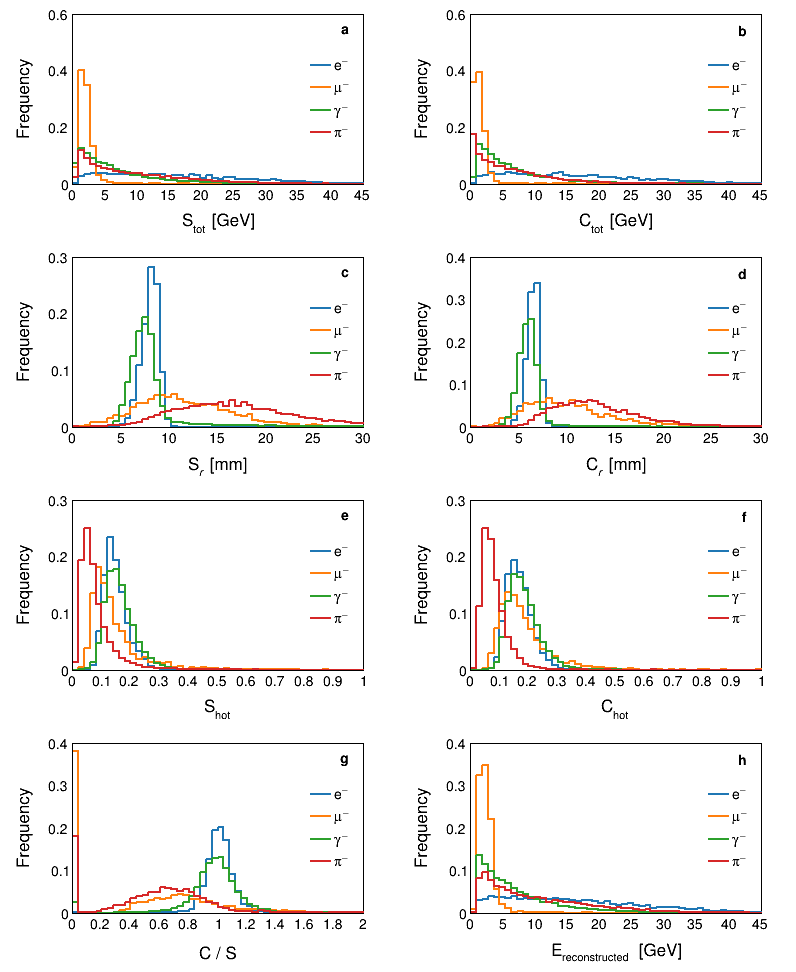

In [70]:
ROOT.gStyle.SetOptStat("ou")
xmax = [45, 45, 30., 30., 1., 1., 2., 45] #200.]
ymax = [0.6, 0.6, 0.3, 0.4, 0.3, 0.3, 0.4, 0.4] #1.1]
xtitle = ['S_{tot} [GeV]', 'C_{tot} [GeV]', 'S_{#it{r}} [mm]', 'C_{#it{r}} [mm]', 
          'S_{hot}', 'C_{hot}', 'C / S', 'E_{reconstructed} [GeV]'] #'d_{c} [3 mm]']
varsname = ["S_sum_GeV", "C_sum_GeV", "S_rad_mean_mm", "C_rad_mean_mm", 
            "S_hot", "C_hot", "CoverS", 'rec_energy_GeV'] #"dist2charge"]
hs = [None, None, None, None, None, None, None, None]
label_dict = {0: 'e^{#minus}', 1: '#mu^{#minus}', 2: '#gamma^{#minus}', 3: '#pi^{#minus}'}
alpha = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
legend = [None,]*8
t3 = [None,]*8

for i,col in enumerate(varsname):
    c1.cd(i+1)
    ROOT.gPad.SetLeftMargin(0.17)
    ROOT.gPad.SetRightMargin(0.07)
    ROOT.gPad.SetBottomMargin(0.22)
    ROOT.gPad.SetTopMargin(0.02)

    
    hs[i] = ROOT.THStack("hs","");
    for j in np.unique(df.label.values):
        model = ("", label_dict[j], 50, 0., xmax[i]) #d.Filter(f"!std::isnan({col})").Max(col).GetValue())
        d2 = d.Filter(f'label == {j} && !std::isnan({col})')
        if i == 0:
            print(j, d2.Count().GetValue())
        h = d2.Histo1D(model, col)
        h.SetLineColor(palette_lst[j].GetNumber())
        h.SetLineWidth(linewidth)
#         h.GetXaxis().SetRange(1, h.GetNbinsX() + 1)
#         if j == 0:
#             h.DrawNormalized("hist")
#         else:
#             h.DrawNormalized("same")
        h.Scale(1./h.Integral())
        hs[i].Add(h.GetPtr().Clone())
#     hs[i].GetXaxis().SetRange(1, h.GetNbinsX() + 1)

    hs[i].Draw("hist nostack")
    ROOT.gPad.Modified()
    ROOT.gPad.Update()
    hs[i].GetXaxis().SetTitle(xtitle[i])
    hs[i].GetYaxis().SetTitle("Frequency")    
    
    hs[i].GetXaxis().SetTitleSize(ratio2 * hs[i].GetXaxis().GetTitleSize())
    hs[i].GetYaxis().SetTitleSize(ratio2 * hs[i].GetYaxis().GetTitleSize())
    
    labelsize = ratio * hs[i].GetXaxis().GetLabelSize()
    hs[i].GetXaxis().SetLabelSize(labelsize)
    hs[i].GetYaxis().SetLabelSize(labelsize)
    
    labeloffset1 = (ratio) * hs[i].GetXaxis().GetLabelOffset()
    labeloffset2 = (ratio + 1.5) * hs[i].GetXaxis().GetLabelOffset()

    hs[i].GetXaxis().SetLabelOffset(labeloffset2)
    hs[i].GetYaxis().SetLabelOffset(labeloffset1)
    
    hs[i].GetXaxis().SetTitleOffset(1.3 * hs[i].GetXaxis().GetTitleOffset())
    hs[i].GetYaxis().SetTitleOffset(0.73 * hs[i].GetXaxis().GetTitleOffset())
     
#     hs[i].GetXaxis().SetTickLength(0.7 * ratio * hs[i].GetXaxis().GetTickLength())
#     hs[i].GetYaxis().SetTickLength(0.7 * ratio * hs[i].GetYaxis().GetTickLength())

    hs[i].GetXaxis().SetTickLength(0.)
    hs[i].GetYaxis().SetTickLength(0.)

    hs[i].GetXaxis().CenterTitle()
    hs[i].GetYaxis().CenterTitle()
    
    hs[i].SetMaximum(ymax[i])
#     if i != 7:
    hs[i].GetYaxis().SetNdivisions(505)
    
#     if i == 0:
    x2 = 1-ROOT.gPad.GetRightMargin()#-hs[i].GetYaxis().GetTickLength()
    x1 = x2 - 0.15
    ymid = ROOT.gPad.GetBottomMargin()+(1-ROOT.gPad.GetBottomMargin()-ROOT.gPad.GetTopMargin())/2
    y1 = ymid-2*ratio*linespacing
    y2 = ymid+2*ratio*linespacing
    legend[i] = ROOT.gPad.BuildLegend(x1, y1, x2, y2, "", "l")
    legend[i].SetBorderSize(0)
    legend[i].SetMargin(0.5)
    legend[i].SetTextSize(labelsize)
    ROOT.gPad.Modified()
    ROOT.gPad.Update()
    
    t3[i] = ROOT.TLatex(1-ROOT.gPad.GetRightMargin()-0.035, 1-ROOT.gPad.GetTopMargin()-0.05, alpha[i])
    t3[i].SetTextSize(labelsize)
    t3[i].SetTextAlign(ROOT.kHAlignRight+ROOT.kVAlignTop)
    t3[i].SetNDC(ROOT.kTRUE)
    t3[i].Draw()

c1.Modified()
c1.Update()
c1.Print("discriminating_variables.png")
c1.Draw()